### Model Prediction





### Also good to share some mathematical background


its also good to visualize how the function works in linear space, here I have demonstrated this below

Y = M * x + E   will be transformed into 


math score)  = B* Gender + B * Ethnic + B * lunch + B * test completed + B*level of education + B * Reading scores + B * Writing score + E


where Y = math score - dependent variable


B = M and E are parameter - M measures the coeficient of independent variables while E measure the cost function or Error


Independent variables are Gender, Ethnic grp, Lunch, test completed and level of Education, Reading score, writing score





# The Architecture of this problem 

1. Data Exploration
2. Feature engineering / Data transformation
3. Data splitting
4. Model training 
5. Fine tuning
6. choose the best model and test

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer # to handle transformations to both object and numerical data
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV

In [7]:
data = pd.read_csv("C:/Users/Rotim/OneDrive/Documents/Data_Science_Projects/Student_ML_Project/Notebook/StudentsPerformance.csv")

In [8]:
Y = data['math score']
X = data.drop(("math score"), axis =1)

categorical_features = X.select_dtypes(exclude="number").columns.to_list()
numerical_features = X.select_dtypes(exclude="object").columns.to_list()

Data_transformer = ColumnTransformer([("categorical_transformer",OneHotEncoder(), categorical_features), 
                  ("numerical_transformer",StandardScaler(), numerical_features)])

In [9]:
X_transformed = Data_transformer.fit_transform(X)

print("The shape of the transformed data is ", X_transformed.shape)

The shape of the transformed data is  (1000, 19)


### Data splitting

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X_transformed, Y, test_size= .2 , random_state= 5)

### Model training

In [13]:
# lets import base model

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error,mean_squared_error,accuracy_score

In [14]:
# creating a list of models to be used

Model_list = {"linear_model": LinearRegression(),     
              
              "Random_forest": RandomForestRegressor(),
              "Ridge" : Ridge(),
              "Lasso": Lasso(),
              "AdaBoost" : AdaBoostRegressor(),
              "Decision_Tree": DecisionTreeRegressor(),
             "Xgboost" : XGBRegressor() }

In [15]:
def Evaluation_model(model):

    "define a function that evaluates the performance of model"

    model.fit(X_train, Y_train)

    Y_predict = model.predict(X_test)
    MSE = np.mean((Y_predict-Y_test)**2)
    R2_score = r2_score(Y_predict,Y_test)

    return MSE, R2_score


In [102]:
r2_scores_list = []
mse_list  = []
model_name = []

for i in Model_list:
    mean_squared_error_, r2_score_values = Evaluation_model(Model_list[i])
    r2_scores_list.append(r2_score_values)
    mse_list.append(mean_squared_error_)
    model_name.append(i)
    print("\n")
    print(i)
    print("MSE", mean_squared_error_)
    print("R2_score", r2_score_values * 100, end = "\n")
    # print("\n")



linear_model
MSE 29.806436767578123
R2_score 85.89180092567533


Random_forest
MSE 38.58620401388889
R2_score 80.4704402117252


Ridge
MSE 29.8251410867931
R2_score 85.74502961262762


Lasso
MSE 44.02101368562044
R2_score 69.4850103987003


AdaBoost
MSE 45.81851009465312
R2_score 75.69270579083637


Decision_Tree
MSE 82.775
R2_score 62.496541039329465


Xgboost
MSE 43.44416913995683
R2_score 78.52272987365723


the best model is performing at accuracy of 85.9% and mean squared error of 29.8

In [104]:
model_performance_scores = pd.DataFrame({"model_name" : model_name,
              "MSE_values" : mse_list, 
              "r2_score_values" : r2_scores_list})
model_performance_scores


,model_name,MSE_values,r2_score_values
0,linear_model,29.806437,0.858918
1,Random_forest,38.586204,0.804704
2,Ridge,29.825141,0.857450
3,Lasso,44.021014,0.694850
4,AdaBoost,45.818510,0.756927
5,Decision_Tree,82.775000,0.624965
6,Xgboost,43.444169,0.785227


In [105]:
### Selecting Linear model

In [114]:
Linear_model = LinearRegression(fit_intercept= True)
Linear_model.fit(X_train, Y_train)

Y_predicted = Linear_model.predict(X_test)

r2_score_ = r2_score(Y_predicted , Y_test)
MSE = mean_squared_error(Y_predicted , Y_test)

print(f'r2_score is : {r2_score_ * 100:.2f}' ,  "\n", "Mean squared error is :", MSE)



r2_score is : 85.89 
 Mean squared error is : 29.806436767578123


Text(0.5, 1.0, 'The plot of predicted value Vs Actual value')

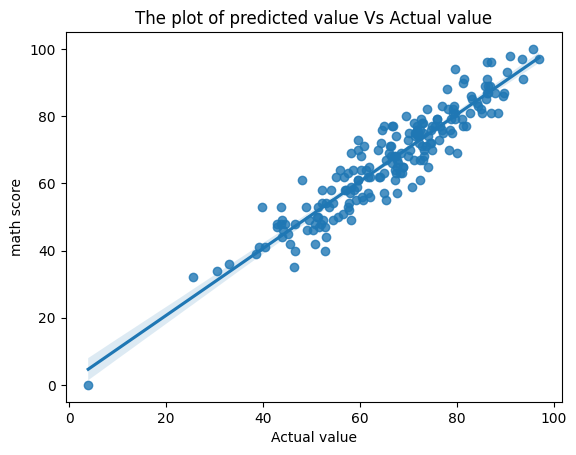

In [ ]:
sb.regplot(x = Y_predicted, y = Y_test)
plt.xlabel("Predicted value")
plt.xlabel("Actual value")
plt.title("The plot of predicted value Vs Actual value");

In [16]:
Model_list

{'linear_model': LinearRegression(),
 'Random_forest': RandomForestRegressor(),
 'Ridge': Ridge(),
 'Lasso': Lasso(),
 'AdaBoost': AdaBoostRegressor(),
 'Decision_Tree': DecisionTreeRegressor(),
 'Xgboost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)}

In [29]:


params = {"alpha" : [.2, .6, .9]}
Ridge_model = Ridge()
Ridge_model.fit(X_train, Y_train)
r2_scores = r2_score(Ridge_model.predict(X_test), Y_test)

print(f"the evaluation score before fitting is {r2_scores}"   )


gs = GridSearchCV(Ridge_model, params, cv = 3)
gs.fit(X_train, Y_train)

Ridge_model.set_params(**gs.best_params_)
Ridge_model.fit(X_train, Y_train)
r2_scores_gd = r2_score(Ridge_model.predict(X_test), Y_test)
print(f"the evaluation score after setting the best param {r2_scores_gd}")












the evaluation score before fitting is 0.8574502961262762
the evaluation score after setting the best param 0.8575197539638323


In [25]:
gs.best_params_

{'alpha': 0.9}